# Project Description
Task: find out the behavior of users in the mobile app by studying the sales funnel.
Then examine the results of the A/A / B experiment as a result of the font change.

### Table of Contents

### [Step 1. Preparing the data for analysis](#Step_1)
### [Step 2. Studying and checking the data](#Step_2)
* [How many events and users are there in the log?](#Step_2_1)
* [Data completeness](#Step_2_2)
* [User Group Membership](#Step_2_3)

### [Step 3. Learning the event funnel](#Step_3)
* [Events in Logs](#Step_3_1)
* [Building the Funnel](#Step_3_2)
* [Where do we lose users?](#Step_3_3)
* [User share from first event to payment](#Step_3_4)

### [Step 4. Study the results of the experiment](#Step_4)
* [Number of users and the difference between A / A groups](#Step_4_1)
* [Most Popular Event](#Step_4_2)
* [Compare A / B groups](#Step_4_3)
* [Conclusions](#Step_4_4)

### [Step 5. General conclusion](#Step_5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st
import numpy as np
import math as mth
import warnings
warnings.filterwarnings("ignore")
from plotly import graph_objects as go

<a id = 'Step_1' > </a>
## Step 1. Prepare the data

In [2]:
# upload data
data = pd.read_csv('logs_exp.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [3]:
# rename columns
data.columns = ['event_name', 'device_id','time_stamp', 'exp_id']
data

,event_name,device_id,time_stamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


### Data description
Each log entry is a user action or event.
* event_name — name of the event;
* device_id — unique user ID;
* time_stamp — time of the event;
* exp_id-experiment number: 246 and 247 are the control groups, and 248 is the experimental group.

In [4]:
# adding the date_time date and time column to the dataframe with the datetime type.
data['date_time'] = pd.to_datetime(data['time_stamp'], unit = 's')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   device_id   244126 non-null  int64         
 2   time_stamp  244126 non-null  int64         
 3   exp_id      244126 non-null  int64         
 4   date_time   244126 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.3+ MB


In [5]:
# Adding date column
data['date'] = data['date_time'].dt.date
data

,event_name,device_id,time_stamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [6]:
#check duplicates
data.duplicated().sum()

413

In [7]:
data[data.duplicated(keep = False)]

,event_name,device_id,time_stamp,exp_id,date_time,date
452,MainScreenAppear,5613408041324010552,1564474784,248,2019-07-30 08:19:44,2019-07-30
453,MainScreenAppear,5613408041324010552,1564474784,248,2019-07-30 08:19:44,2019-07-30
2348,CartScreenAppear,1694940645335807244,1564609899,248,2019-07-31 21:51:39,2019-07-31
2350,CartScreenAppear,1694940645335807244,1564609899,248,2019-07-31 21:51:39,2019-07-31
3572,MainScreenAppear,434103746454591587,1564628377,248,2019-08-01 02:59:37,2019-08-01
...,...,...,...,...,...,...
242359,PaymentScreenSuccessful,2382591782303281935,1565206049,246,2019-08-07 19:27:29,2019-08-07
242360,PaymentScreenSuccessful,2382591782303281935,1565206049,246,2019-08-07 19:27:29,2019-08-07
242362,CartScreenAppear,2382591782303281935,1565206049,246,2019-08-07 19:27:29,2019-08-07
242634,MainScreenAppear,4097782667445790512,1565206618,246,2019-08-07 19:36:58,2019-08-07


Duplicates probably occurred due to some error in compiling the database, or requests to the server were also received by mistake in some cases twice.
Since the percentage of duplicates is less than 1%, we can easily delete them.

In [8]:
data = data.drop_duplicates()
data

,event_name,device_id,time_stamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


### Output
We unloaded the data, replaced the column names with more convenient ones, and added a date and time column, as well as a date column. There are no missing values, duplicates are removed. The data is ready for analysis.

<a id = 'Step_2' > </a>
## Step 2. Examine and verify the data

<a id = 'Step_3_1' > </a>
#### How many events and users are there in the log?

In [9]:
# events in logs
events = data['event_name'].value_counts()
events

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

In [10]:
events.sum()

243713

We see that there are only 5 different events in the logs.
* Home Screen
* Shopping Cart
* Maybe a page with special offers
* Successful purchase screen
* Training


Total events 243713

In [11]:
#number of unique users
users = data['device_id'].nunique()
print('Overall users in log: ',users)

Overall users in log:  7551


In [12]:
med_events_table = data.groupby('device_id').agg({'event_name':'count'})
med_events = int(med_events_table['event_name'].median())
print('On average, there are {} events per user'.format(med_events))

On average, there are 20 events per user


<a id = 'Step_2_2'> </a>
#### What period of data do we have?

In [13]:
data['date_time'].describe()

count                  243713
unique                 176654
top       2019-08-01 14:40:35
freq                        9
first     2019-07-25 04:43:36
last      2019-08-07 21:15:17
Name: date_time, dtype: object

The first date is July 25, 2019, and the last date is August 7, 2019.

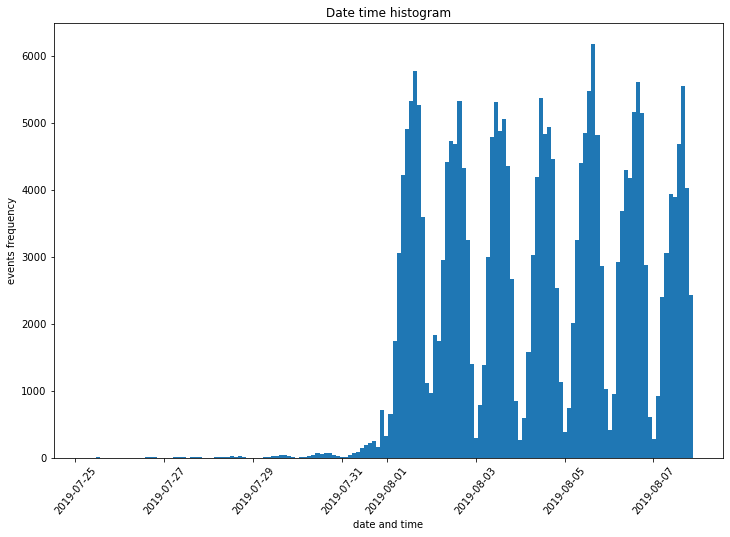

In [14]:
plt.figure(figsize = (12,8))
plt.hist(bins = 150, x=data["date_time"])
plt.xticks(rotation = 50)
plt.xlabel('date and time')
plt.ylabel('events frequency')
plt.title('Date time histogram')
plt.show()

Regarding the histogram, we can be sure of the completeness of the data only for August.
Let's discard the data for July. Probably, the data obtained during this period is a trial run of the test.

In [15]:
old_data = data.query('date_time < "2019-08-01"')
old_data

,event_name,device_id,time_stamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
2823,OffersScreenAppear,2413191300976302222,1564617295,247,2019-07-31 23:54:55,2019-07-31
2824,MainScreenAppear,5505110279185484837,1564617450,247,2019-07-31 23:57:30,2019-07-31
2825,MainScreenAppear,5505110279185484837,1564617462,247,2019-07-31 23:57:42,2019-07-31
2826,MainScreenAppear,5505110279185484837,1564617472,247,2019-07-31 23:57:52,2019-07-31


If we discard the old data, we will lose 2030 events.

In [16]:
old_data['device_id'].nunique()

1451

The old data contains 924 unique users.

In [17]:
#the number of users in actual data
data = data.query('date_time >= "2019-08-01"')
data['device_id'].nunique()

7534

In [18]:
print('The difference between the number of unique users in the data before and after the cleansing:', (users - data['device_id'].nunique()))

The difference between the number of unique users in the data before and after the cleansing: 17


At the same time, we see that in the current data, the number of unique users decreased by only 17 after optimization. Most likely, the same buyers took part in the pilot launch.

<a id = 'Step_2_3' > </a>
#### Let's check if we have users from all three experimental groups.

In [19]:
data.groupby('exp_id').agg({'device_id':'count'})

,device_id
exp_id,
246,79302
247,77022
248,84563


We obtained close values of the number of events for all three groups.

#### Conclusion

At this stage, the data was examined.
Initially, the log had 243713 events and 7551 users. The average for the entire time of the study, there are 20 events per user.
We also found the time period that we actually have, we have data starting from July 25, but judging by the graph of the histogram, the data for July is most likely a trial run of testing, so we exclude them from the analysis. At the same time, after the deletion, the number of events decreased by 2030, but the number of unique users decreased by only 17.
Thus, we have only the data for August at our disposal.

<a id = 'Step_3' > </a>
## Step 3. Exploring the event funnel

In [20]:
# Events in logs
data['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

As already mentioned above, there are 5 different events in the logs.

* Home Screen
* Maybe a page with special offers
* Shopping Cart
* Successful purchase screen
* Training

##### Let's count how many users committed each of these events. Let's sort the events by the number of users. Let's calculate the percentage of users who have made an event at least once.

In [21]:
data_grouped = data.groupby(['event_name','exp_id']).agg({'device_id':'nunique'}).sort_values(by = 'device_id', ascending = False).reset_index()
data_grouped

,event_name,exp_id,device_id
0,MainScreenAppear,248,2493
1,MainScreenAppear,247,2476
2,MainScreenAppear,246,2450
3,OffersScreenAppear,246,1542
4,OffersScreenAppear,248,1531
5,OffersScreenAppear,247,1520
6,CartScreenAppear,246,1266
7,CartScreenAppear,247,1238
8,CartScreenAppear,248,1230
9,PaymentScreenSuccessful,246,1200


Let's calculate the percentage of users who have made an event at least once.

In [22]:
# table with the total number of users
data_event = data.groupby('exp_id')['device_id'].nunique().reset_index()
data_event.columns = ['exp_id', 'overall_unique']
data_event

,exp_id,overall_unique
0,246,2484
1,247,2513
2,248,2537


In [23]:
# Merging tables
final_data = data_grouped.merge(data_event, on = 'exp_id', how = 'outer')
final_data = final_data.set_index('event_name')
final_data.columns = ['exp_id', 'device_count', 'overall_unique']
final_data

,exp_id,device_count,overall_unique
event_name,,,
MainScreenAppear,248,2493,2537
OffersScreenAppear,248,1531,2537
CartScreenAppear,248,1230,2537
PaymentScreenSuccessful,248,1181,2537
Tutorial,248,279,2537
MainScreenAppear,247,2476,2513
OffersScreenAppear,247,1520,2513
CartScreenAppear,247,1238,2513
PaymentScreenSuccessful,247,1158,2513


In [24]:
# Adding the share of users who have completed the event at least once
final_data['ratio_for_users'] = final_data['device_count'] / final_data['overall_unique']
data_for_analysis = final_data.groupby(['exp_id','event_name','device_count']).agg({'ratio_for_users':'mean'}).sort_values(by = ['exp_id','device_count'], ascending = [True,False]).reset_index().set_index(['exp_id','event_name'])
data_for_analysis

device_count  ratio_for_users
exp_id event_name                                            
246    MainScreenAppear                 2450         0.986312
       OffersScreenAppear               1542         0.620773
       CartScreenAppear                 1266         0.509662
       PaymentScreenSuccessful          1200         0.483092
       Tutorial                          278         0.111916
247    MainScreenAppear                 2476         0.985277
       OffersScreenAppear               1520         0.604855
       CartScreenAppear                 1238         0.492638
       PaymentScreenSuccessful          1158         0.460804
       Tutorial                          283         0.112614
248    MainScreenAppear                 2493         0.982657
       OffersScreenAppear               1531         0.603469
       CartScreenAppear                 1230         0.484825
       PaymentScreenSuccessful          1181         0.465510
       Tutorial                          279         0.109972

The success criterion is the completed purchase event. The percentage of users who have made a purchase at least once out of the total number of unique users in this group is higher in group 246 than in 247 and 248.

Also, the sequence of actions follows logically from this table:
MainScreenAppear (home screen) -> OffersScreenAppear (special offers) -> CartScreenAppear (shopping cart) -> PaymentScreenSuccessful (purchase made).
Thus, the tutorial falls out of the order, since users may need help at different stages of viewing the site.

##### Let's build a funnel of events

In [25]:
# we will not take it into account in the tutorial funnel
data_new = data.query('event_name != "Tutorial"')
data_new

,event_name,device_id,time_stamp,exp_id,date_time,date
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,247,2019-08-01 00:10:15,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


Each row of the table is a user. The columns show the time when each event was first triggered. If an event from the category did not happen, in its cell — NaT

<a id = 'Step_4_3' > </a>
#### Let's write a function for calculating the funnel for different experimental groups

In [26]:
def funnel(group):
    data_even = data_new.query('exp_id == @group')
    users = data_even.pivot_table(
        index='device_id', 
        columns='event_name', 
        values='date_time',
        aggfunc='min') 
    
    step_1 = ~users['MainScreenAppear'].isna()
    step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
    step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
    step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['OffersScreenAppear'])

    n_pageview = users[step_1].shape[0]
    n_offers = users[step_2].shape[0]
    n_cart = users[step_3].shape[0]
    n_payment = users[step_4].shape[0]
    if group == 246 or group == 247:
        print('Funnel for the control group')
    else:
        print('Funnel for the experimental group')
    print('visited main screen:', n_pageview)
    print('Visited the page with special offers:', n_offers)
    print('started placing an order:', n_cart)
    print('Paid :', n_payment)
    fig = go.Figure(go.Funnel(
    y = ["main screen", "page with special offer", "started placing an order", "paid"],
    x = [n_pageview, n_offers, n_cart, n_payment], textinfo = 'percent previous+percent initial+value' ))
    fig.show("svg")

Funnel for the control group
visited main screen: 2450
Visited the page with special offers: 1411
started placing an order: 584
Paid : 546


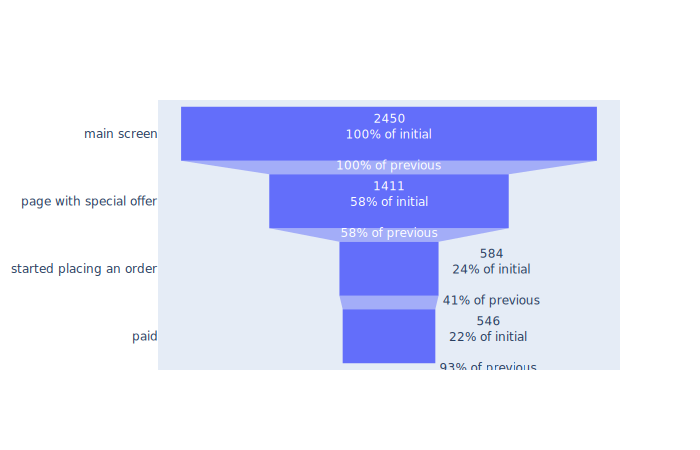

In [27]:
funnel(246)

Funnel for the control group
visited main screen: 2476
Visited the page with special offers: 1379
started placing an order: 600
Paid : 563


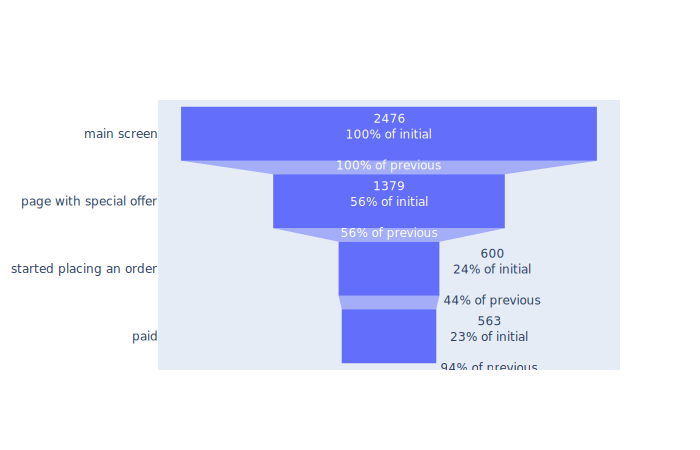

In [28]:
funnel(247)

Funnel for the experimental group
visited main screen: 2493
Visited the page with special offers: 1411
started placing an order: 583
Paid : 556


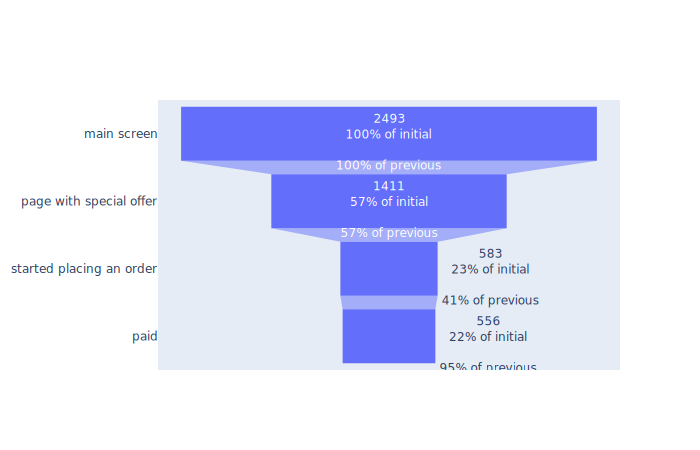

In [29]:
funnel(248)

This data can be interpreted as follows: the funnels were obtained taking into account the sequence of events. It follows from them that after the page with special offers, a very large number of users" fall off", but probably many users go to the design without visiting the page with special offers, so I think it is more correct to build a simple product funnel without taking into account the sequence of events.

In [30]:
data_for_analysis

device_count  ratio_for_users
exp_id event_name                                            
246    MainScreenAppear                 2450         0.986312
       OffersScreenAppear               1542         0.620773
       CartScreenAppear                 1266         0.509662
       PaymentScreenSuccessful          1200         0.483092
       Tutorial                          278         0.111916
247    MainScreenAppear                 2476         0.985277
       OffersScreenAppear               1520         0.604855
       CartScreenAppear                 1238         0.492638
       PaymentScreenSuccessful          1158         0.460804
       Tutorial                          283         0.112614
248    MainScreenAppear                 2493         0.982657
       OffersScreenAppear               1531         0.603469
       CartScreenAppear                 1230         0.484825
       PaymentScreenSuccessful          1181         0.465510
       Tutorial                          279         0.109972

In [31]:
#simple funnel function
def funnel_simple(group):
    data_funnel = data_for_analysis.reset_index().query('exp_id == @group')
    if group == 246 or group == 247:
            layout = go.Layout(
        title="Simple funnel for the control group",
    
        yaxis=dict(
            title="the number of users"
        ) ) 
    else: 
        layout = go.Layout(
        title="Simple funnel for the experimental group",
    
        yaxis=dict(
            title="the number of users"
        ) ) 
    x = ["main screen", "page with special offers", "started placing an order", "paid"]
    y = data_funnel['device_count']
    fig = go.Figure(layout = layout ,data=[go.Bar(
            x=x, y=y,
            text=(data_funnel['ratio_for_users'].map('{:.2%}'.format)),
            textposition='auto'
        )])
    fig.show("svg")
    
    

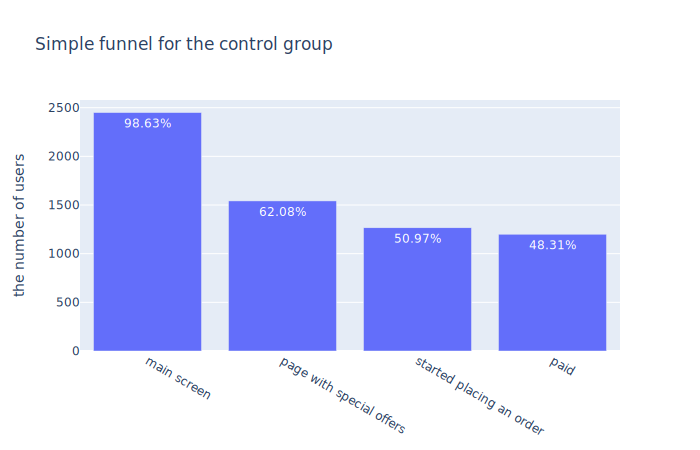

In [32]:
funnel_simple(246)

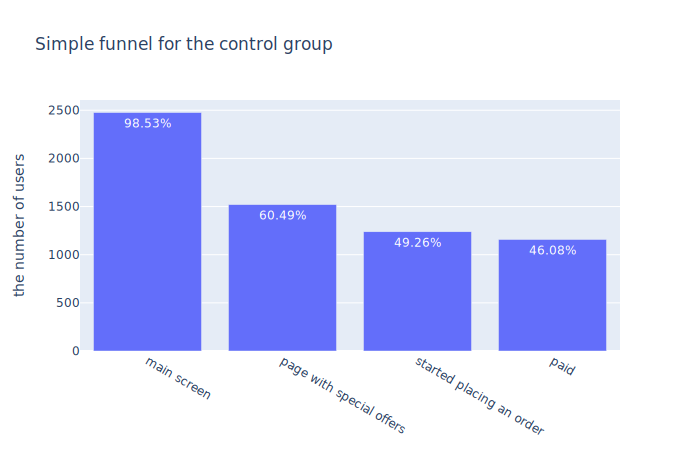

In [33]:
funnel_simple(247)

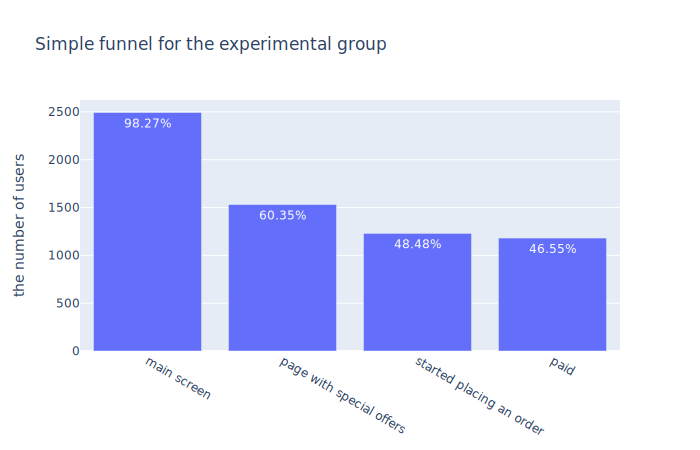

In [34]:
funnel_simple(248)

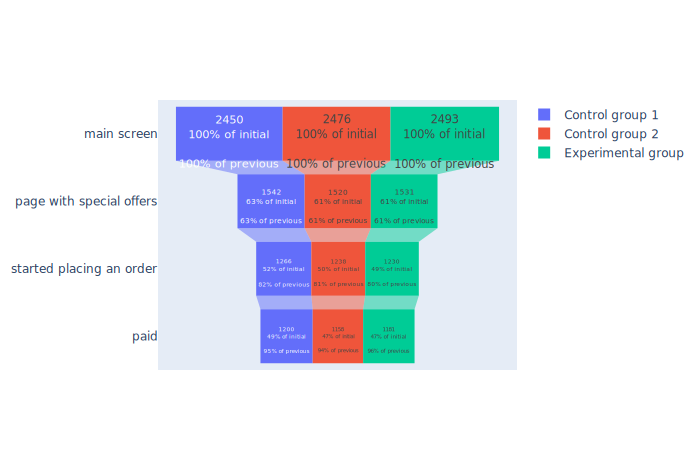

In [35]:
fig = go.Figure()
layout = go.Layout(
        title="Simple funnel for 3 different groups",
    
        yaxis=dict(
            title="the number of users"
        ) ) 
fig.add_trace(go.Funnel(
    name = 'Control group 1',
    y = ["main screen", "page with special offers", "started placing an order", "paid"]
    ,
    x = data_for_analysis.reset_index().query('exp_id == 246')['device_count'],
    textinfo = 'percent previous+percent initial+value'))

fig.add_trace(go.Funnel(
    name = 'Control group 2',
    orientation = "h",
    y = ["main screen", "page with special offers", "started placing an order", "paid"],
    x = data_for_analysis.reset_index().query('exp_id == 247')['device_count'],
    textposition = "inside",
    textinfo = 'percent previous+percent initial+value'))

fig.add_trace(go.Funnel(
    name = 'Experimental group',
    orientation = "h",
    y = ["main screen", "page with special offers", "started placing an order", "paid"],
    x = data_for_analysis.reset_index().query('exp_id == 248')['device_count'],
    textposition = "inside",
    textinfo = 'percent previous+percent initial+value'))

fig.show("svg")

<a id = 'Step_3_3' > </a>
<a id = 'Step_3_4' > </a>
It is worth noting that at the first step of the funnel, a small number of users were lost, possibly due to some software error.
We lose the most users after the 1st step, that is, after visiting the main screen.
From the first event to the payment comes 48.3% and 46.1% of the total number of unique users in the case of the control groups and 46.55% in the case of the experimental group.

#### Conclusion

At this stage, we sorted the events by frequency and assumed a sequence of events (Main Screen -> Page with special offers -> Started placing an order -> Paid for), and also assumed that the tutorial is not included in the standard funnel, since people switch to it from different stages.
We also determined that the funnel, taking into account the sequence of events, is not suitable for analysis, due to the fact that many users switch to payment from different stages.
Using a simple product funnel, we determined that most users are lost after switching from the main screen to the screen.
Less than 50% of users reach the payment.
At the same time, the difference between the control and experimental groups does not look significant, then we will check the statistical significance of the differences.

<a id = 'Step_4' ></a>
## Step 4. Let's study the results of the experiment

<a id = 'Step_4_1' ></a>
#### Number of users in each experimental group

In [36]:
data_event = data.groupby('exp_id')['device_id'].nunique().reset_index()
data_event.columns = ['exp_id', 'overall_unique']
data_event

,exp_id,overall_unique
0,246,2484
1,247,2513
2,248,2537


##### Let's check whether the statistical criteria find the difference between samples 246 and 247.

Let's test the hypotheses for the conversion rates during the transition from event to event.

H0 - there is no difference between conversions from the total number of unique users in the MainScreenAppear event

H1 - conversions to the MainScreenAppear event are different for the two control groups

In [37]:
#drop tutorial event
data_for_analysis = data_for_analysis.query('device_count > 300')
data_for_analysis = data_for_analysis.reset_index(level=[0,1])
data_for_analysis

,exp_id,event_name,device_count,ratio_for_users
0,246,MainScreenAppear,2450,0.986312
1,246,OffersScreenAppear,1542,0.620773
2,246,CartScreenAppear,1266,0.509662
3,246,PaymentScreenSuccessful,1200,0.483092
4,247,MainScreenAppear,2476,0.985277
5,247,OffersScreenAppear,1520,0.604855
6,247,CartScreenAppear,1238,0.492638
7,247,PaymentScreenSuccessful,1158,0.460804
8,248,MainScreenAppear,2493,0.982657
9,248,OffersScreenAppear,1531,0.603469


In [38]:
data_test = data_for_analysis.merge(data_event, on = 'exp_id')
data_test

,exp_id,event_name,device_count,ratio_for_users,overall_unique
0,246,MainScreenAppear,2450,0.986312,2484
1,246,OffersScreenAppear,1542,0.620773,2484
2,246,CartScreenAppear,1266,0.509662,2484
3,246,PaymentScreenSuccessful,1200,0.483092,2484
4,247,MainScreenAppear,2476,0.985277,2513
5,247,OffersScreenAppear,1520,0.604855,2513
6,247,CartScreenAppear,1238,0.492638,2513
7,247,PaymentScreenSuccessful,1158,0.460804,2513
8,248,MainScreenAppear,2493,0.982657,2537
9,248,OffersScreenAppear,1531,0.603469,2537


Let's formulate hypotheses before conducting tests.

H0 - there is no difference between conversions from the total number of unique users to different events for the groups being checked

H1-conversions to different events are different for the two groups being checked

In [39]:
data_test

,exp_id,event_name,device_count,ratio_for_users,overall_unique
0,246,MainScreenAppear,2450,0.986312,2484
1,246,OffersScreenAppear,1542,0.620773,2484
2,246,CartScreenAppear,1266,0.509662,2484
3,246,PaymentScreenSuccessful,1200,0.483092,2484
4,247,MainScreenAppear,2476,0.985277,2513
5,247,OffersScreenAppear,1520,0.604855,2513
6,247,CartScreenAppear,1238,0.492638,2513
7,247,PaymentScreenSuccessful,1158,0.460804,2513
8,248,MainScreenAppear,2493,0.982657,2537
9,248,OffersScreenAppear,1531,0.603469,2537


In [40]:
#function for calculating the statistical significance.
def stat(group1, group2, data):
    alpha = .05 / 16
    print('Testing the hypothesis about the difference of the shares between the groups {} and {}'.format(group1,group2))
    print()
    for event in data['event_name'].unique():
        screen = np.array([data.query('exp_id == @group1 & event_name == @event')['device_count'].tolist(),
                  data.query('exp_id == @group2 & event_name == @event')['device_count'].tolist()])
        overall = np.array([data.query('exp_id == @group1 & event_name == @event')['overall_unique'].tolist(),
                  data.query('exp_id == @group2 & event_name == @event')['overall_unique'].tolist()])
        p1 = screen[0] / overall[0]
        p2 = screen[1] / overall[1]
        p_combined = (screen[0] + screen[1]) / (overall[0] + overall[1])
        difference = p1 - p2
        print('event', event)
        print(f'ratio 1 = {p1[0]:.7f}')
        print(f'ratio 2 = {p2[0]:.7f}')
        # we calculate the statistics in the standard deviations of the standard normal distribution
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/overall[0] + 1/overall[1])) 

        # setting the standard normal distribution (mean 0, standard deviation 1)
        distr = st.norm(0, 1)  
        p_value = (1 - distr.cdf(abs(z_value))) * 2

        print(f"p-value = {p_value[0]:.2f}")

        if (p_value < alpha):
            print("We reject the null hypothesis: there is a significant difference between conversions to events")
        else:
            print("It was not possible to reject the null hypothesis, there is no reason to consider the conversions different") 
        print()    

In [41]:
stat(246,247, data_test)

Testing the hypothesis about the difference of the shares between the groups 246 and 247

event MainScreenAppear
ratio 1 = 0.9863124
ratio 2 = 0.9852766
p-value = 0.76
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event OffersScreenAppear
ratio 1 = 0.6207729
ratio 2 = 0.6048548
p-value = 0.25
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event CartScreenAppear
ratio 1 = 0.5096618
ratio 2 = 0.4926383
p-value = 0.23
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event PaymentScreenSuccessful
ratio 1 = 0.4830918
ratio 2 = 0.4608038
p-value = 0.11
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different



The hypothesis of equal shares could not be rejected. Statistical tests do not find any difference between the control samples.
The division into groups is most likely correct.

Similarly, we will check the control groups with the experimental one. The hypotheses are also similar..

In [42]:
# groups 246,248
stat(246,248, data_test)

Testing the hypothesis about the difference of the shares between the groups 246 and 248

event MainScreenAppear
ratio 1 = 0.9863124
ratio 2 = 0.9826567
p-value = 0.29
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event OffersScreenAppear
ratio 1 = 0.6207729
ratio 2 = 0.6034687
p-value = 0.21
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event CartScreenAppear
ratio 1 = 0.5096618
ratio 2 = 0.4848246
p-value = 0.08
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event PaymentScreenSuccessful
ratio 1 = 0.4830918
ratio 2 = 0.4655104
p-value = 0.21
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different



There is no reason to reject the hypotheses about the equality of the shares of the control group 246 and the experimental group 248 at all stages of the user's interaction with the site.

In [43]:
#Groups 247,248
stat(247,248, data_test)

Testing the hypothesis about the difference of the shares between the groups 247 and 248

event MainScreenAppear
ratio 1 = 0.9852766
ratio 2 = 0.9826567
p-value = 0.46
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event OffersScreenAppear
ratio 1 = 0.6048548
ratio 2 = 0.6034687
p-value = 0.92
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event CartScreenAppear
ratio 1 = 0.4926383
ratio 2 = 0.4848246
p-value = 0.58
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event PaymentScreenSuccessful
ratio 1 = 0.4608038
ratio 2 = 0.4655104
p-value = 0.74
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different



Similarly, there is no reason to reject the hypotheses about the equality of the shares of the control group 247 and the experimental group 248 at all stages of the user's interaction with the site.

Now let's compare the results with the combined control group

In [44]:
# Making copy of initial dataset
data_copy = data_new.copy()
data_copy = data_copy.replace ({246 :'246 + 247', 247:'246 + 247'})
data_copy

,event_name,device_id,time_stamp,exp_id,date_time,date
2829,MainScreenAppear,3737462046622621720,1564618080,246 + 247,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246 + 247,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246 + 247,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,246 + 247,2019-08-01 00:08:59,2019-08-01
2833,MainScreenAppear,4899590676214355127,1564618215,246 + 247,2019-08-01 00:10:15,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,246 + 247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246 + 247,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246 + 247,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246 + 247,2019-08-07 21:14:58,2019-08-07


In [45]:
data_for_test = data_copy.groupby(['exp_id','event_name']).agg({'device_id':'nunique'}).sort_values(by = ['exp_id','device_id'], ascending = [True,False]).reset_index().set_index(['exp_id','event_name'])
data_for_test = data_for_test.reset_index(level=[0,1])
data_for_test

,exp_id,event_name,device_id
0,248,MainScreenAppear,2493
1,248,OffersScreenAppear,1531
2,248,CartScreenAppear,1230
3,248,PaymentScreenSuccessful,1181
4,246 + 247,MainScreenAppear,4926
5,246 + 247,OffersScreenAppear,3062
6,246 + 247,CartScreenAppear,2504
7,246 + 247,PaymentScreenSuccessful,2358


In [46]:
data_event_copy = data_copy.groupby('exp_id')['device_id'].nunique().reset_index()
data_event_copy.columns = ['exp_id', 'overall_unique']
data_event_copy

,exp_id,overall_unique
0,248,2535
1,246 + 247,4995


In [47]:
data_test_copy = data_for_test.merge(data_event_copy, on = 'exp_id')
data_test_copy.columns = ['exp_id', 'event_name','device_count','overall_unique']
data_test_copy

,exp_id,event_name,device_count,overall_unique
0,248,MainScreenAppear,2493,2535
1,248,OffersScreenAppear,1531,2535
2,248,CartScreenAppear,1230,2535
3,248,PaymentScreenSuccessful,1181,2535
4,246 + 247,MainScreenAppear,4926,4995
5,246 + 247,OffersScreenAppear,3062,4995
6,246 + 247,CartScreenAppear,2504,4995
7,246 + 247,PaymentScreenSuccessful,2358,4995


In [48]:
stat("246 + 247", 248 , data_test_copy)

Testing the hypothesis about the difference of the shares between the groups 246 + 247 and 248

event MainScreenAppear
ratio 1 = 0.9861862
ratio 2 = 0.9834320
p-value = 0.35
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event OffersScreenAppear
ratio 1 = 0.6130130
ratio 2 = 0.6039448
p-value = 0.45
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event CartScreenAppear
ratio 1 = 0.5013013
ratio 2 = 0.4852071
p-value = 0.19
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different

event PaymentScreenSuccessful
ratio 1 = 0.4720721
ratio 2 = 0.4658777
p-value = 0.61
It was not possible to reject the null hypothesis, there is no reason to consider the conversions different



When comparing the experimental and combined control samples, no statistically significant differences in the proportions were obtained.

<a id = 'Step_4_4' > </a>
#### Conclusion

Judging by the results of the z-tests, we were not able to reject the hypotheses about the equality of the shares in any of the cases.
According to this data, most likely, font changes do not affect the store's visitors in any way.
However, given the number of hypotheses(16), the probability of getting a false result is too high, so it is necessary to reduce the probability of a false positive result. For the correction, we apply the Bonferroni correction: divide all significance levels by 16.

After changing the significance level, all the results remain relevant.
Probably, indeed, there is no reason to believe that changing the font changes user behavior in any way.

<a id = 'Step_5'> </a>
## Step 5. General output.

In the first step of the project, data was uploaded, duplicates were processed, and types were changed.
Then the data was examined. As a result of the analysis, we determined that we have complete data only for August. Next, event funnels were built with and without the sequence of events. Since users can navigate to the tutorial page from different pages, it was decided not to take into account the sequence of events for the A / B test, most users were lost when navigating from the main screen.
Then A/A tests were performed sequentially to make sure that future calculations were correct, and A / B tests were performed by fractions. As a result of the tests, no statistically significant differences were found. Due to the large number of hypotheses being tested, the Bonferroni correction was applied, but the conclusions did not change.

Summarizing all of the above, we can say with a high degree of probability that the type of font does not affect the behavior of users. A / B test can be completed and recognized as successful.